In [8]:
import kagglehub

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
#path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

#print("Path to dataset files:", path)

df = pd.read_csv(r'..\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv')

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [15]:
df.shape

(2443651, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [17]:
df.isna().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [18]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [19]:
df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [22]:
df['isBestSeller'].value_counts()

isBestSeller
False    2435671
True        7980
Name: count, dtype: int64

In [27]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['proportion'] = crosstab[True] / crosstab.sum(axis=1)
crosstab.sort_values('proportion', ascending=False)

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [28]:

## There are three categories with most best-sellers products, groceries, smart home and health personal care products. 

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.


In [32]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [37]:
chi2, p, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value, ##expected_freq

(36684.23786636857, 0.0)

In [38]:
cramer_v = association(crosstab, method="cramer")

ValueError: `observed` must be an integer array.

In [ ]:
## Yes, the both columns are independent as the p_value is lower then 0.05.
## And also, the strenght is weak as the cramers V test is near to 0. 

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [ ]:
crosstab_result_sorted.plot(kind="bar", stacked=True);

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

In [39]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [40]:
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
df2 = df.iloc[~outliers.index,:] # ~ = NOT

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [41]:
df2

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing
2443625,2828566,B095K5HFZ7,SHIMA SX-2 EVO LADY Motorbike Shoes for Women ...,4.6,170,99.95,False,0,Motorbike Clothing
2443622,2828563,6040458925,starlingukpk Quality Flexible Motorbike Motorc...,4.2,2,9.99,False,0,Motorbike Clothing
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
...,...,...,...,...,...,...,...,...,...
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
12,13,B09ZXDMNCY,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

<Axes: xlabel='category', ylabel='price'>

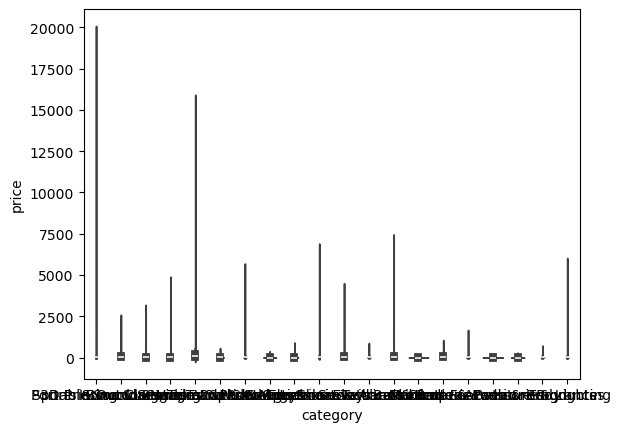

In [42]:
top_20 = df2['category'].value_counts().nlargest(20).index
sns.violinplot(data=df2[df2['category'].isin(top_20)], x='category', y='price')

In [ ]:
df3 = df.groupby("category")['price'].agg(['mean','median']).sort_values('median',ascending=False).head(20)

In [43]:
df4 = df.groupby("category")['price'].agg(['mean','median'])

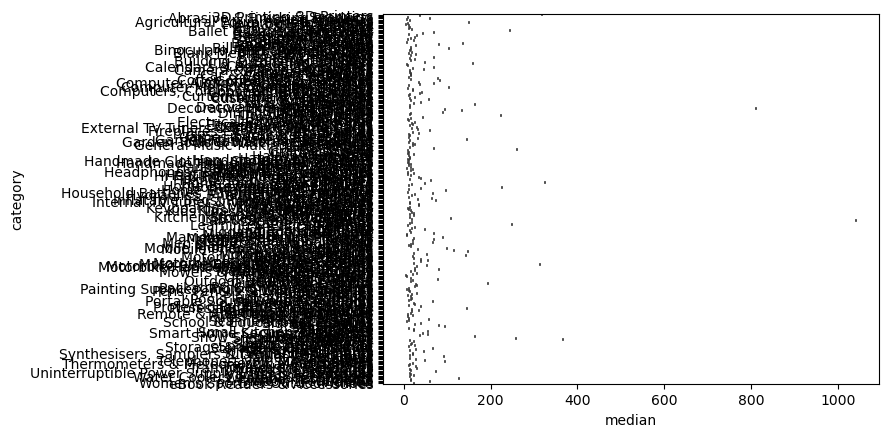

In [44]:
sns.violinplot(data=df4, x='median', y= 'category', palette="coolwarm", hue='category', legend=False);

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.


<Axes: xlabel='category'>

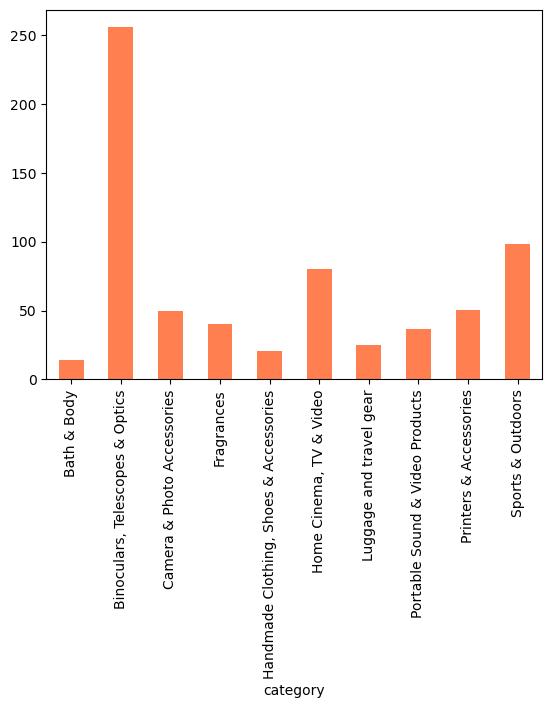

In [46]:
top10_cats = df2['category'].value_counts().head(10).index
avg_prices = df2[df2['category'].isin(top10_cats)].groupby('category')['price'].mean()
avg_prices.plot(kind='bar', color='coral')

In [ ]:
df5 = df2.groupby("category")['price'].agg(['mean']).sort_values('mean',ascending=False).head(10)
df5

In [ ]:
display(df2["category"].value_counts().head(10))
sns.countplot(data=df2, x="category", order=df["category"].value_counts().head(10).index);

In [ ]:
## The category that presents the highier avegare price is binoculars.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

<Axes: xlabel='category', ylabel='stars'>

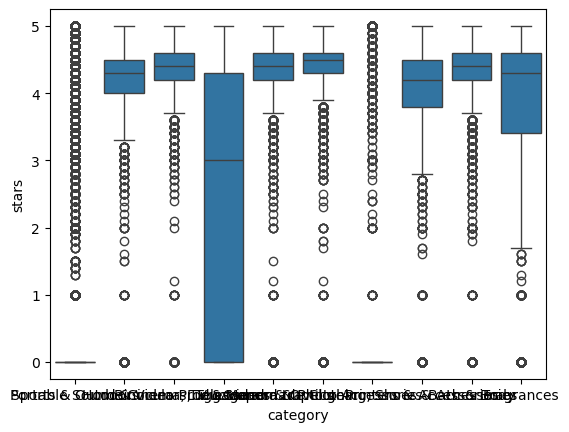

In [47]:
top10 = df2['category'].value_counts().nlargest(10).index
sns.boxplot(data=df2[df2['category'].isin(top10)], x='category', y='stars')

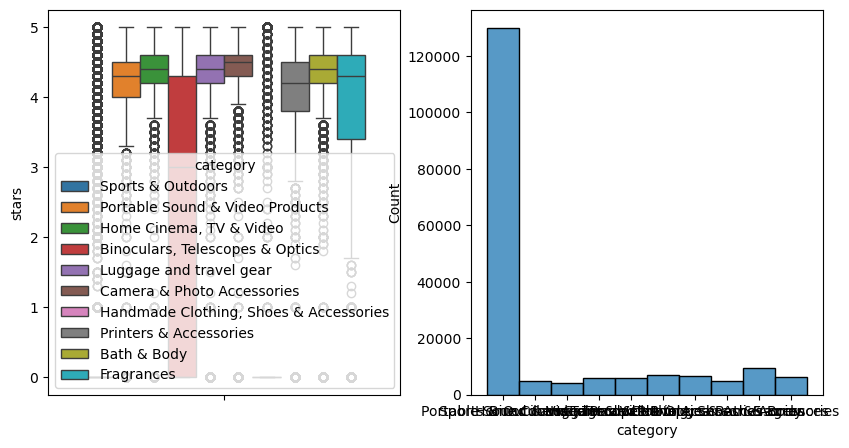

In [53]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df2[df2['category'].isin(top10)], y='stars', hue='category',ax=axes[0])
sns.histplot(data=df2[df2['category'].isin(top10)], x='category',ax=axes[1])
plt.show()

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [57]:
crosstab_star_price = pd.crosstab(df2['price'], df2['stars'])
correlation = df2['price'].corr(df2['stars'])
correlation
#crosstab_star_price

-0.0984252544741653

## No, there isn't a significant relationship between price and stars.

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

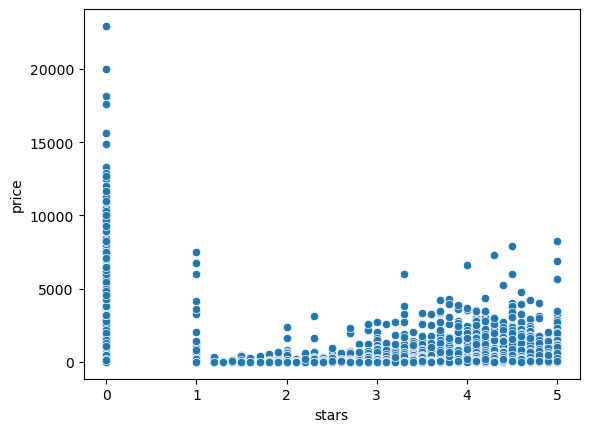

In [60]:
sns.scatterplot(data=df2, y='price', x='stars');

In [64]:
df_numerical = df2.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical

,uid,stars,reviews,price,boughtInLastMonth
2443640,2828581,0.0,0,10.99,0
2443631,2828572,5.0,4,60.62,0
2443625,2828566,4.6,170,99.95,0
2443622,2828563,4.2,2,9.99,0
2443619,2828560,0.0,0,166.99,0
...,...,...,...,...,...
31,32,4.4,2616,199.99,0
23,24,4.7,8700,98.95,0
12,13,4.6,1881,17.99,0
9,10,4.5,16014,29.99,0


In [66]:
df2.drop("uid", inplace=True, axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_15176\242288059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop("uid", inplace=True, axis=1)


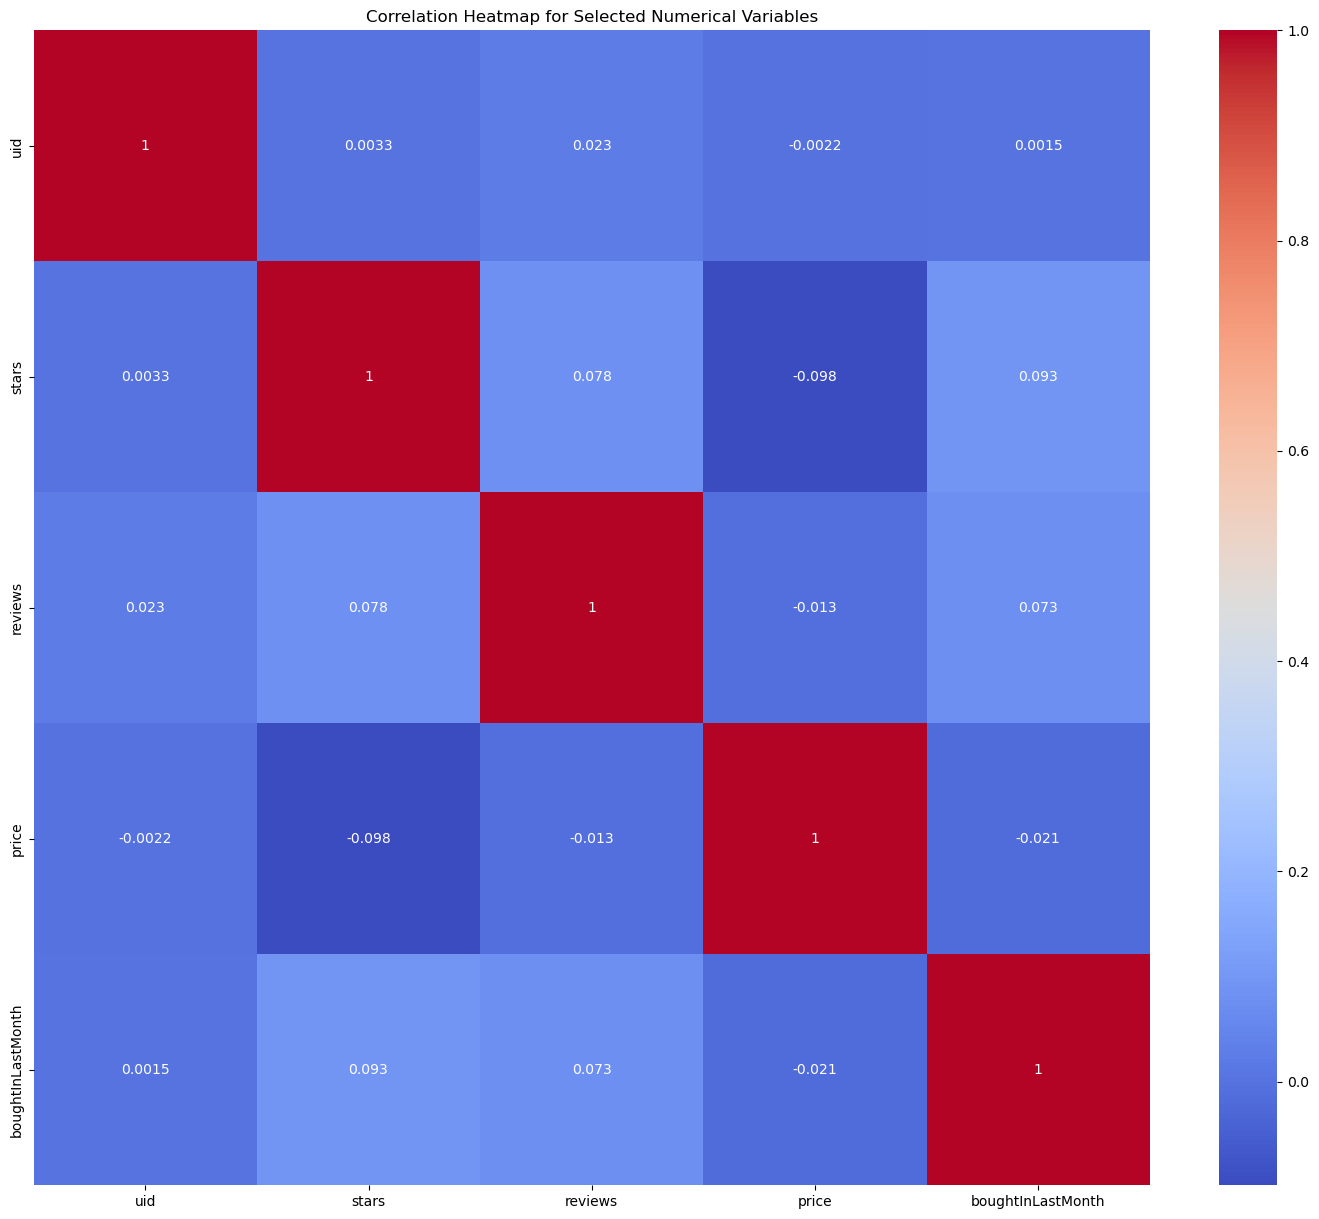

In [67]:
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [69]:
import statsmodels.api as sm

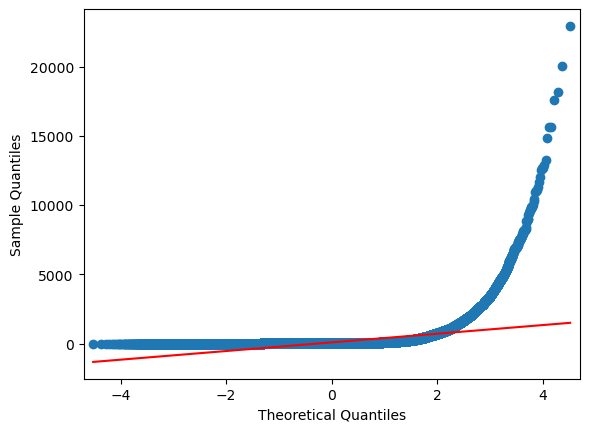

In [71]:
sm.qqplot(df2['price'], line='s');